# A Model to predict Housing Prices
## Jemila Dávila Girón

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

# Abstract

The data analysis performed in this project aims to improve the analysis earlier perfomed by Dr. Williams to build a model that predicts a house sale price in relation to a series of dependent variables.

Thanks to the linear regression model that we have used in the analysis, we find out that a 91.17% of the Sales prices can be predicted by using the 7 variables we integrated in our analysis. With this result we accomplish our goal, build a more accurate model than Dr. William's.

## 1. Introduction



This project revolves around a dataset regarding several dependent variables used to estimate the price of differents houses. In this data set, the Sales Prices variable is the main independent variable and all the rest of the variables are the independent ones. The goal of this project is to improve the resutls obtained by Dr. Williams in his previous example by perfoming a more accurate data analysis and adding more dependent variables into the analysis.

Firstly, for a faster and easier understanding of the project, an abstract and this introduction are provided. Then, in the second chapter of the project, the data is presented and all the variabels used in our analysis are described. In the last two sections of this chapter, we explore the data by creating histograms through making use of the library matplotlib and afterwards we estimate the correlation between the data.

In the third chapter of this project, we start by offering an intorduction of what a linear regression model actually is, the origins of it and how it can be implemented in Python. Afterwards, we implemented the linear regression algorithym to obtain the results we were looking for and in the last part of this chapter we reflect on the results obtained.

Lastly, we dedicate a chapter to the conclusions we came across while doing this project.
A small bibliography has been added after the conclusions chapter.

## 2. The data


### 2.1 Import the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Description
**SalePrice** - The property's sale price in dollars. This is the target variable we are trying to predict.

**MSSubClass** - The building class

**MSZoning** - The general zoning classification

**MasVnArea** - Masonary Veneer Area in sq ft

**LotFrontage** - Linear feet of street connected to property

**LotArea** - Lot size in square feet

**Street** - Type of road access

**Alley** - Type of alley access LotShape - General shape of property

**LandContour** - Flatness of the property

**Utilities** - Type of utilities available

**LotConfig** - Lot configuration

**LotShape** - General shape of property

**LandSlope** - Slope of property

**Neighborhood** - Physical locations within Ames city limits

**Condition1** - Proximity to various conditions

A linear Regression model is used in this project in order to predict the house pricing results
*Y = X1β1 + X2β2 + X3β3...*

Where is Y is the dependent variable (Sales Price) and X is the independent variable. Our goal is to use a number of this columns to predict the dependent variable Y, the sales price by multiplying each row by the Beta 

In [2]:
data = pd.read_csv('houseSmallData.csv')
#First we will see the shape of our data and afterwards we will chop it down. For that, we will make use of some training data using just 20 rows.
data.shape
train = data. iloc[0:20,:]
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# investigate Sale Price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

### 2.2 Data Exploration

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

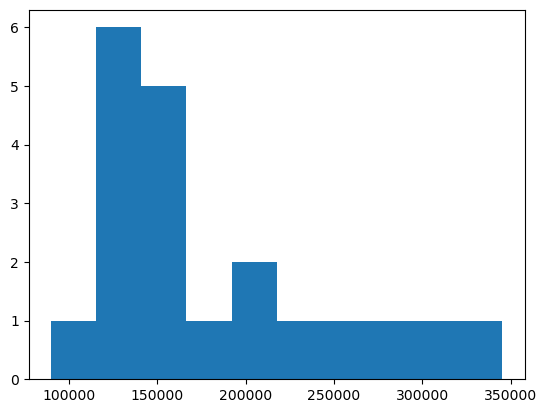

In [4]:
# plot hist to see what the distribution of the Sales prices is
plt.hist(train[ 'SalePrice'])

In [5]:
# select numeric columns
# calculate correlation factor. The correlation factor will tell us which columns are important for us to include.
numeric = train.select_dtypes (include=[np.number])
numeric.shape

(20, 40)

### 2.3 Data Preparation

### 2.4 Correlation

In [6]:
#We will figure out the correlation by just using the numeric columns
corr = numeric.corr()
#Out of this correlation, we want to find out what's correlated with Sales Prices. Out of this columns, we want to pick out the most important at the top and the least important at the bottom.
cols = corr['SalePrice'].sort_values(ascending=False)[0:8].index
cols

Index(['SalePrice', 'OverallQual', 'MasVnrArea', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'GarageArea'],
      dtype='object')

In [7]:
# pick out & cols and y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea
0,7,196.0,2,8,2003,2003,548
1,6,0.0,2,6,1976,1976,460
2,7,162.0,2,6,2001,2002,608
3,7,0.0,1,7,1915,1970,642
4,8,350.0,2,9,2000,2000,836
5,5,0.0,1,5,1993,1995,480
6,8,186.0,2,7,2004,2005,636
7,7,240.0,2,7,1973,1973,484
8,7,0.0,2,8,1931,1950,468
9,5,0.0,1,5,1939,1950,205


## 3. Project Description

This analysis improves the analysis performed by Dr. Williams because while the professor only used two variables (*OverallQual*, *MasVnrArea*), we have added 5 more variables to the analysis (*FullBath*, *TotRmsAbvGrd*, *YearBuilt* and *YearRemodAdd*, 'GarageArea'). This turns in a total of 7 variabales analysed in this project.

We have selected these 5 new variables because we reckon they refer to important data to be considered when purchasing a house and/or when to estimate the value of a house. By including these variables to the project, it elevates the chances of obtaining a more accurate price estimation. The more variables are included in the analysis, the higher and accurate the final porcentaje estimation will be.

### 3.1 Linear Regression

### What is Linear Regression?

Linear regression is a fundamental statistical technique used for modeling the relationship between a dependent variable and one or more independent variables. It assumes that there exists a linear relationship between the independent variables and the dependent variable. In other words, it seeks to find the best-fitting straight line through the data points.

### Origins of the Linear Regression

The origin of linear regression dates back to the early 19th century when it was first introduced by Sir Francis Galton, a British mathematician and biologist. The method gained popularity in the field of statistics and is widely used in various fields such as economics, finance, engineering, and social sciences.

### Mathematical explaination and formulas

Mathematically, linear regression aims to find the coefficients of the linear equation that best represents the relationship between the independent variables *x* and the dependent variable *y*. The linear equation takes the form:

*Y = X1β1 + X2β2 + X3β3...*

Where:

* y is the dependent variable.
* *x1*, *x2*, *x3*,... *xn* are the independent variables.
* *β1*, *β2*,*β3*,... *βn* are the coefficients (parameters) to be estimated.
* ε represents the error term.



### How to implement Linear Regression in Python

To implement the algorithim in Python we need to follow the following steps:

1. Prepare the dataset by cleaning and splitting it into training and testing sets.
2. Initialize the Linear Regression model using libraries like *scikit-learn*.
3. Train the model using the training data.
4. Evaluate the model's performance using metrics like Mean Squared Error.
5. Make predictions on new data using the trained model.


### 3.2 Analysis 

In [8]:
# build Linear Regression Model
from sklearn import linear_model
# linear_model.LinearRegression() is used to instantiate the linear regression model so it can be implemented.
lr = linear_model.LinearRegression()
# To build the model we need to fit the data. The function fit () fits the model according to the given training data.
model = lr.fit(X, Y)
predictions = model.predict(X)

In [9]:
# How good is the model. The function score () returns the mean accuracy score of our model.
model.score(X,Y) #This will tell us how much(%) of the Sales Prices can be predicted by the dependent variables

0.9117220871982935

#### 91% is already predicted from just by the first 5 variables, which improves Dr. Williams prediction by 0.16 %

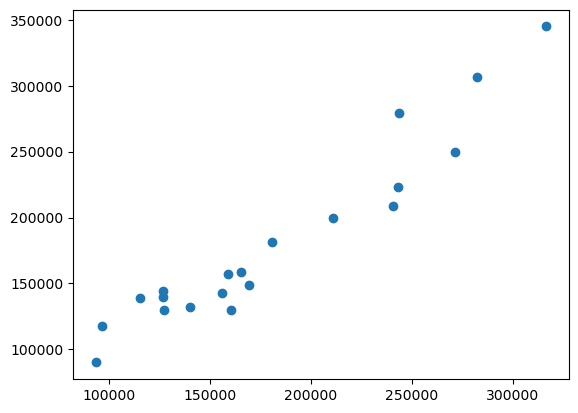

In [10]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

#### We can observe that the data shown in the plot represents a much clearer and visible straight line than the result obtained by Dr. Williams

### 3.3 Results

To build our Linear Regression Model and improve Dr.Williams model we have followed the following steps:
1. Firstly, we explore the data by creating a graph out of the **Sales Prices** variable alone to see how the data looked like.
2. Then, we figured out the correlation of the data by just using the numeric columns making use of the following code:
corr = numeric.corr()
By doing this, we waned to find out what's correlated with Sales Prices.
3. Moving forward, we started implementing the Linear Regression algorithym by importing the sklearn import linear_model from *sklearn*
4. Afterwards, we instantiate the linear regression model using the code **linear_model.LinearRegression()** so it can be implemented. in order to build the model, we used the funtion **fit()** accordign to the given data.
5. in the fifth place, we tested how good our model was. For that, we used the funciton **score()** to obtained the accuracy of our model. The function returned a 91.17%, which is much accurate than the 75% obtained in the model by Dr. Williams.
6. Lastly, we scattered the results creating a plot with Matplotlib. The graph obtaiend showed that the data follows a clear direction than the one presented by Dr. William's previous model.

## Conclusion

The result we obtained from our analysis shows that a 91.17% of the independent Variable **Sales Prices** can be predicted by the 7 dependent variables we introduced in our analysis. Dr. Williams made used of
only two variables and he obtained that a 75% of the Sales Prices independet variable could be predicted.
Therefore, we can observe that our model worked better because the percentage we obtaiend is higher and subsequently, more accurate.

From this project, we can extract the conclusion that the more independent variables we intorduce in our analysis, the more accurate the prediction to the independent variable will be.

## References

- Stojiljković, Mirko. "Linear Regression in Python". Real Python. 04/10/2024. https://realpython.com/linear-regression-in-python/